# Medical Cost Personal Insurance Project

In [4]:
#IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#IMPORTING THE DATASET
ds1 = pd.read_csv('C:/Users/aruts/Desktop/medical_cost_insurance.csv')
ds1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
ds1.shape

(1338, 7)

  - Therefore the dataset has 1338 rows and 7 columns. 
  - Among the 7 columns age, BMI, children & charges are the numerical data and Sex, smoker and region are categorical data
  - According to the problem statement, the ‘charges’ column is our target variable
  - So the remaining 6 columns such as Age, BMI, Children, Sex, Smoker and Region are our independent variables

In [7]:
#CHECHING FOR THE DATA TYPES OF EACH COLUMN
ds1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
#CHECKING FOR NULL VALUES
ds1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Therefore the dataset has no null values

In [10]:
#CHECKING FOR THE COUNT OF EVERY VALUES IN EACH COULMNS
for i in ds1.columns:
    print(ds1[i].value_counts())

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
       

From the above output we can confirm that the dataset doesn't have any white spaces or blank values 

In [11]:
ds1.duplicated().sum()

1

In [12]:
ds1.drop_duplicates(inplace=True)
ds1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
#SEPERATING CATEGORICAL AND NUMERICAL COLUMNS
cat_col=[]
num_col=[]
for i in ds1.dtypes.index:
    if ds1.dtypes[i]=="object":
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


In [14]:
ds1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


From the above output We can infer that

    - There are no values in the data set
    - Mean is almost equal to the median (50%) in all the above numerical values and so skewness will not be there
    - There is no much difference between the 75% and the maximum value and so the outliers will not be there in the dataset

UNIVARIATE ANALYSIS

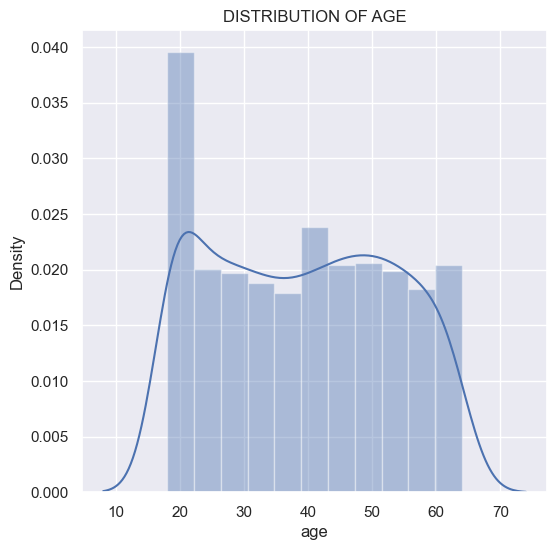

In [15]:
#DISTRIBUTION OF AGE
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(ds1['age'])
plt.title('DISTRIBUTION OF AGE')
plt.show()


From the above plt we can infer that most of the people are under the age group aroud 20

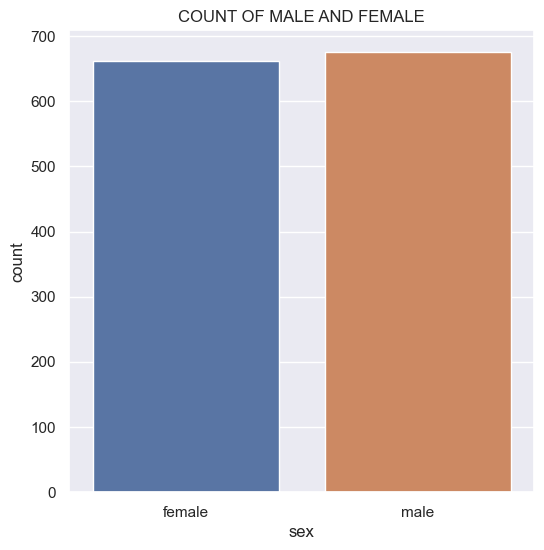

In [16]:
#COUNT PLOT FOR GENDER COLUMN
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=ds1)
plt.title('COUNT OF MALE AND FEMALE')
plt.show()

COUNT OF MALE AND FEMALE ARE ALMOST EQUAL

In [17]:
ds1['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

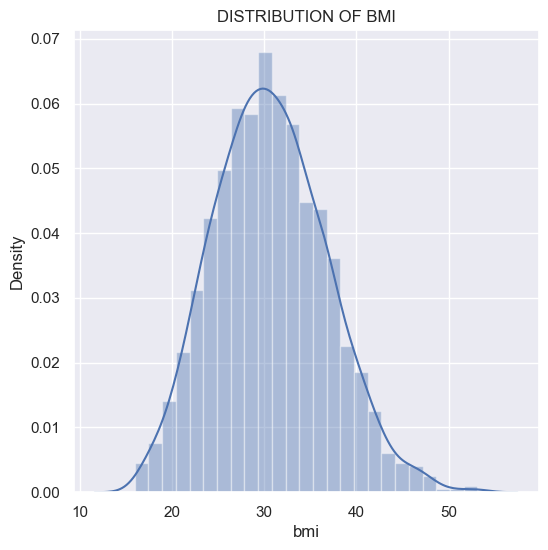

In [18]:
#DISTRIBUTION OF BMI
plt.figure(figsize=(6,6))
sns.distplot(ds1['bmi'])
plt.title('DISTRIBUTION OF BMI')
plt.show()

We have obtained a bell shaped curve and so that we can say that the data is normall distributed

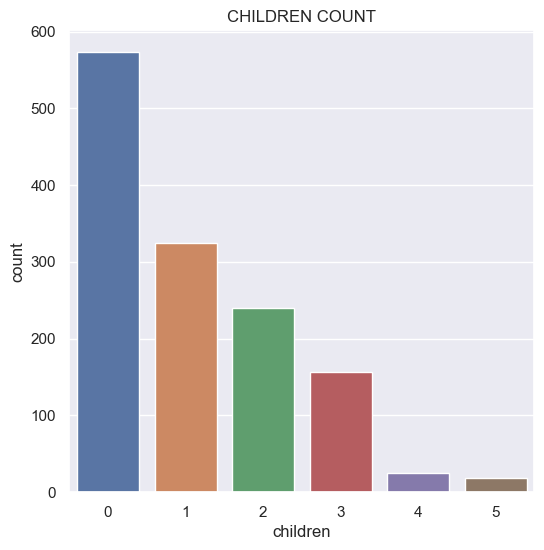

In [19]:
#CHILDREN COUNT
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=ds1)
plt.title('CHILDREN COUNT')
plt.show()

Most of the people do not have a child. Many of the people are having 1 or 2 children. Very of them are having 3 or above

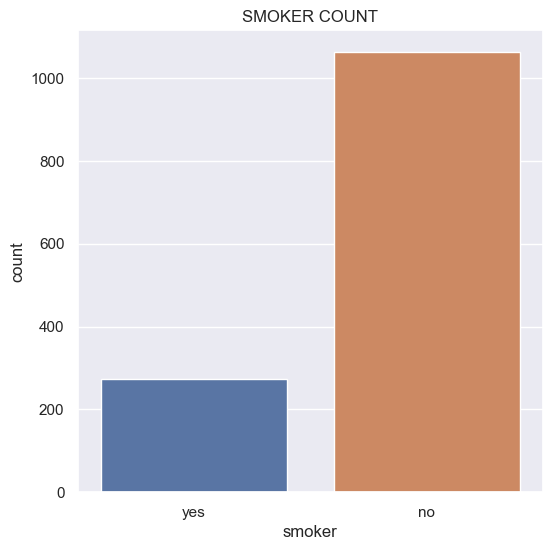

In [20]:
#SMOKER COUNT
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=ds1)
plt.title('SMOKER COUNT')
plt.show()

Many of the people are non smokers and it is greater than 1000. Only very few of them are smokers and it is around 200 only

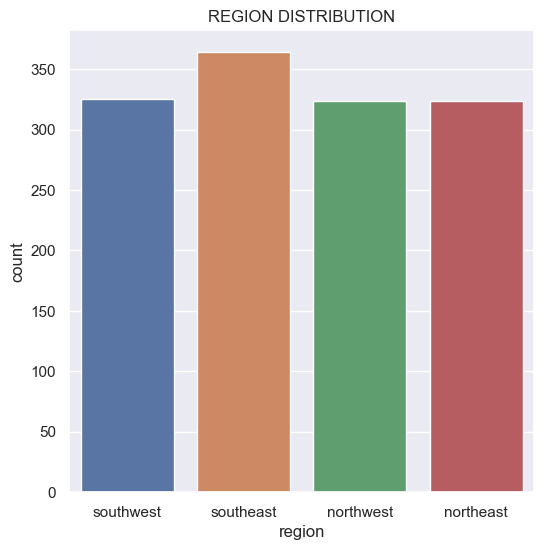

In [21]:
#REGION DISTRIBUTION
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=ds1)
plt.title('REGION DISTRIBUTION')
plt.show()

The people from south east are slightly greater than other region. All the other region have equal no.of persons

In [22]:
ds1['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

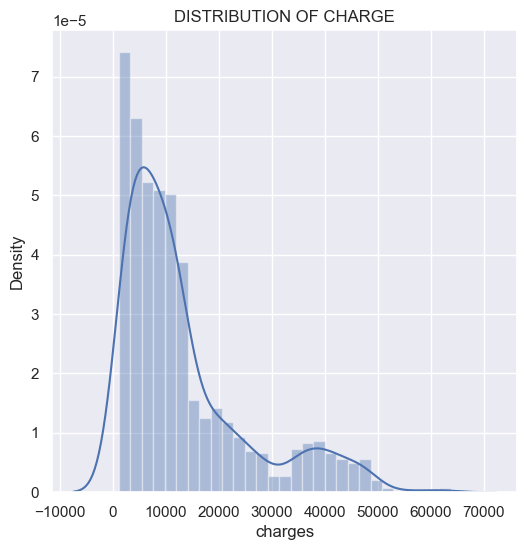

In [23]:
#DISTRIBUTION OF CHARGES
plt.figure(figsize=(6,6))
sns.distplot(ds1['charges'])
plt.title('DISTRIBUTION OF CHARGE')
plt.show()

The data is almost normally distributed. Most of the values are distributed around 10000 USD.

BIVARIATE ANALYSIS

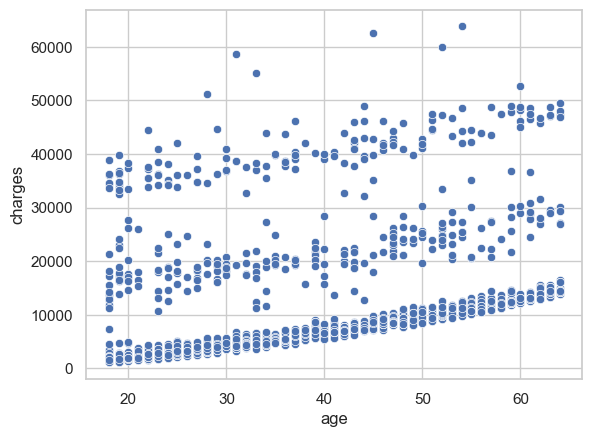

In [24]:
#AGE vs CHARGE
sns.set(style='whitegrid')
sns.scatterplot(x='age',y='charges',data=ds1)
plt.show()

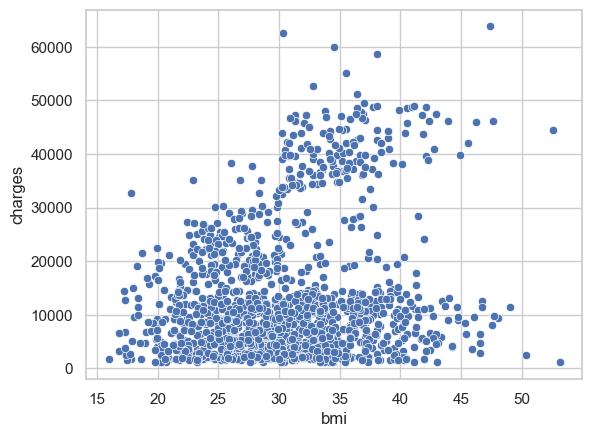

In [25]:
#BMI VS CHARGES
sns.scatterplot(x='bmi',y='charges',data=ds1)
plt.show()

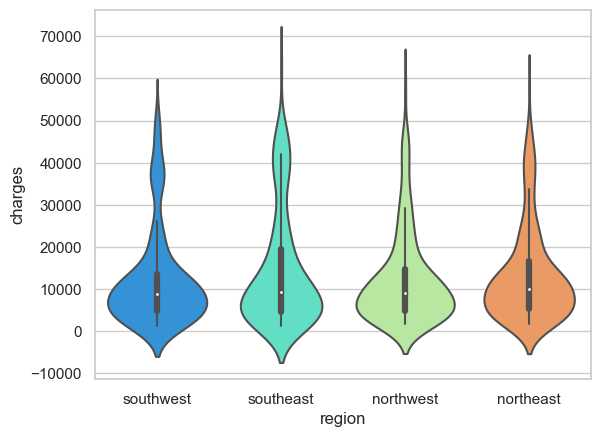

In [26]:
#REGION VS CHARGES
sns.violinplot(x="region", y="charges", data=ds1,palette='rainbow')
plt.show()

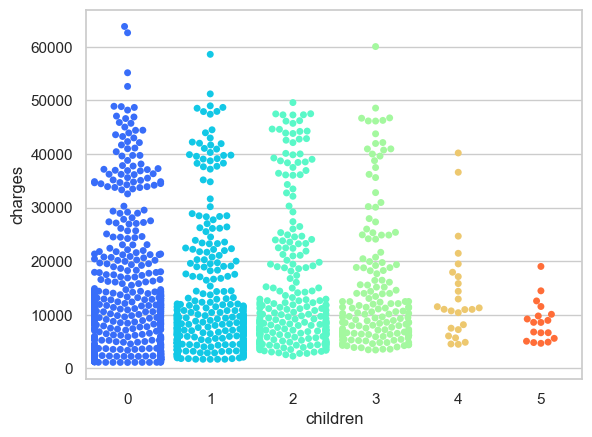

In [27]:
#CHILDREN VS CHARGES
sns.swarmplot(x="children", y="charges", data=ds1,palette='rainbow')
plt.show()

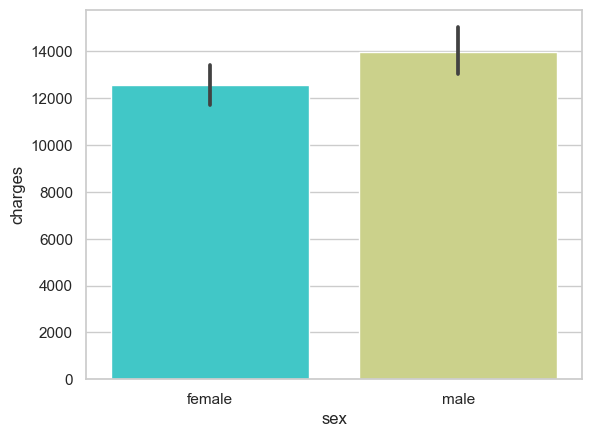

In [28]:
#SEX VS CHARGES
sns.barplot(x="sex", y="charges", data=ds1,palette='rainbow')
plt.show()

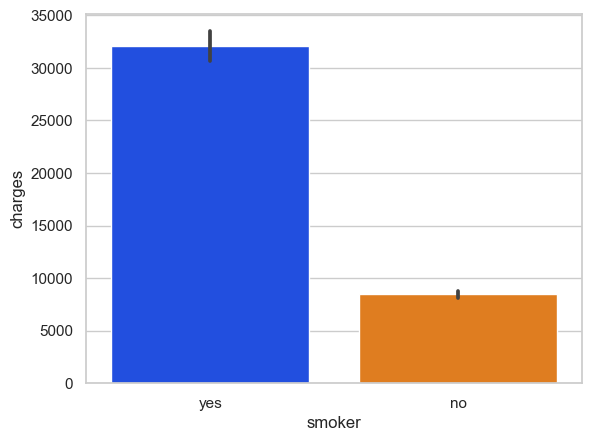

In [29]:
#SMOKER VS CHARGES
sns.barplot(x="smoker", y="charges", data=ds1,palette='bright')
plt.show()

MULTIVARIATE ANALYSIS

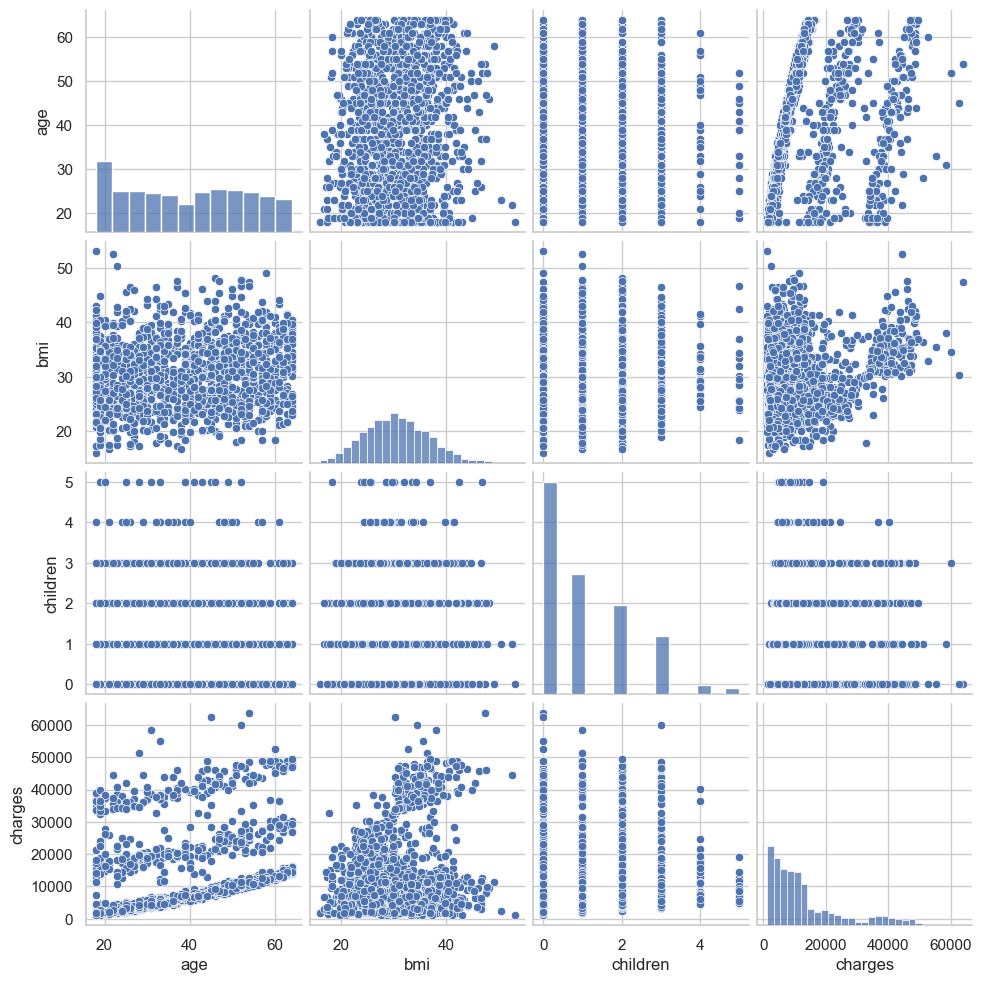

In [30]:
sns.pairplot(ds1)
plt.show()

age            AxesSubplot(0.125,0.53;0.352273x0.35)
bmi         AxesSubplot(0.547727,0.53;0.352273x0.35)
children       AxesSubplot(0.125,0.11;0.352273x0.35)
charges     AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

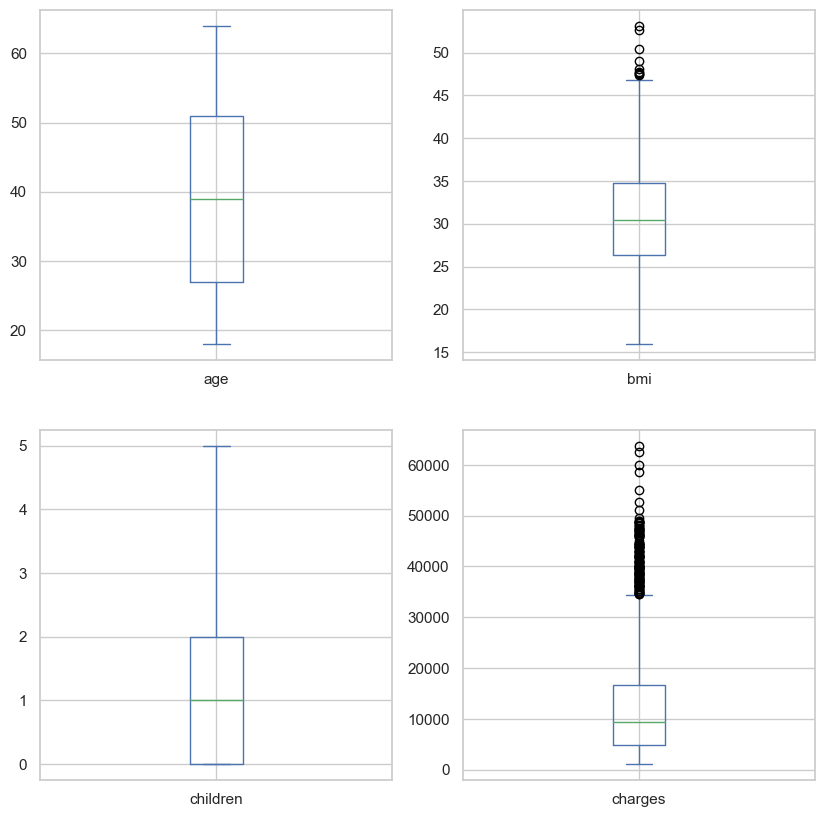

In [31]:
#CHECKING FOR OUTLIERS
ds1.plot(kind='box',subplots=True,figsize=(10,10),layout=(2,2))

<AxesSubplot:xlabel='bmi'>

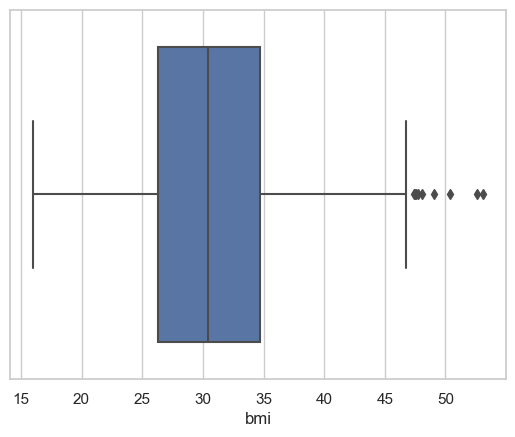

In [32]:
sns.boxplot(x='bmi',data=ds1)

From the above boxplot we can infer that there are outliers in bmi column

In [33]:
#CHECKING FOR OUTLIERS
from scipy.stats import zscore
f=ds1[['bmi']]
z=np.abs(zscore(f))
print(np.where(z>3))

(array([ 116,  846, 1046, 1316], dtype=int64), array([0, 0, 0, 0], dtype=int64))


In [34]:
#REMOVING OUTLIERS
ds11=ds1[(z<3).all(axis=1)]
ds11

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
ds11.shape

(1333, 7)

Therefore totally 4 rows in which outliers were there have been deleted

In [36]:
#CHECKING FOR SKEWNESS
ds11.skew()

age         0.052714
bmi         0.205541
children    0.934451
charges     1.517177
dtype: float64

The columns which has skewness is 'Charges' and 'Children' coulmn in which "Charges" is a target variable and eventhough "Children" column has numerical data it shouls be considered as a categorical column since the no.of unique values is negligible when compared to the total no. of values in the column 

In [37]:
# LABEL ENCODING TECHNIQUE
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    ds11[i]=le.fit_transform(ds11[i].astype(str))
ds11

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


CHECKING FOR CORRELATION

In [38]:
ds11.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017987,0.118978,0.041406,-0.024390,0.002473,0.300658
sex,-0.017987,1.000000,0.037046,0.019357,0.076510,0.003641,0.057923
bmi,0.118978,0.037046,1.000000,0.018058,0.002264,0.155889,0.200868
children,0.041406,0.019357,0.018058,1.000000,0.006744,0.016924,0.066957
smoker,-0.024390,0.076510,0.002264,0.006744,1.000000,-0.002510,0.786519
region,0.002473,0.003641,0.155889,0.016924,-0.002510,1.000000,-0.006743
charges,0.300658,0.057923,0.200868,0.066957,0.786519,-0.006743,1.000000


<AxesSubplot:>

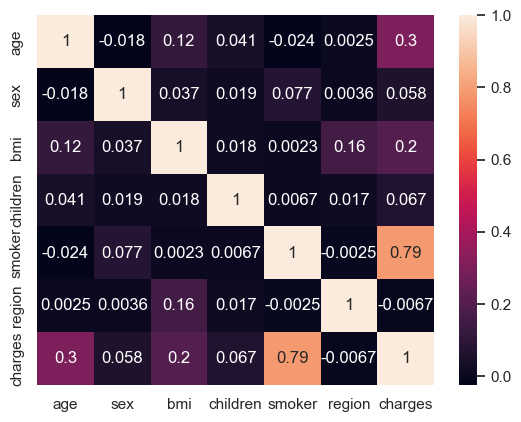

In [39]:
sns.heatmap(ds11.corr(),annot=True,linecolor='black')

There is no much correlation between the data except between smoker and charges which is also a categorical column and also there is no strong correlation between the independent variables and there is no chance for multicolinearity problem

In [40]:
#CORRELATION BETWEEN INDEPENDENT VARIABLES AND TARGET
ds11.corr().charges

age         0.300658
sex         0.057923
bmi         0.200868
children    0.066957
smoker      0.786519
region     -0.006743
charges     1.000000
Name: charges, dtype: float64

In [41]:
#SEPERATING INDEPENDENT VARIABLES AND TARGET
x1 = ds11.drop('charges',axis=1)
y1 = ds11['charges']
print(x1)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1333 rows x 6 columns]


In [42]:
y1

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1333, dtype: float64

In [43]:
#SCALING TO REMOVE BIASNESS - STANDARD SCALING
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x1)
x1

array([[-1.44391729, -1.00677464, -0.45019112, -0.9099223 ,  1.97047808,
         1.34285101],
       [-1.51522515,  0.99327095,  0.52799105, -0.08085434, -0.50749105,
         0.4388003 ],
       [-0.80214655,  0.99327095,  0.39967754,  1.57728158, -0.50749105,
         0.4388003 ],
       ...,
       [-1.51522515, -1.00677464,  1.04124506, -0.9099223 , -0.50749105,
         0.4388003 ],
       [-1.30130157, -1.00677464, -0.80013704, -0.9099223 , -0.50749105,
         1.34285101],
       [ 1.55101281, -1.00677464, -0.25522125, -0.9099223 ,  1.97047808,
        -0.4652504 ]])

In [44]:
x1=pd.DataFrame(data=x1)
x1

,0,1,2,3,4,5
0,-1.443917,-1.006775,-0.450191,-0.909922,1.970478,1.342851
1,-1.515225,0.993271,0.527991,-0.080854,-0.507491,0.438800
2,-0.802147,0.993271,0.399678,1.577282,-0.507491,0.438800
3,-0.445607,0.993271,-1.315891,-0.909922,-0.507491,-0.465250
4,-0.516915,0.993271,-0.286883,-0.909922,-0.507491,-0.465250
...,...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.577282,-0.507491,-0.465250
1329,-1.515225,-1.006775,0.219705,-0.909922,-0.507491,-1.369301
1330,-1.515225,-1.006775,1.041245,-0.909922,-0.507491,0.438800
1331,-1.301302,-1.006775,-0.800137,-0.909922,-0.507491,1.342851


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x1.columns
vif

,VIF Factor,features
0,1.017356,0
1,1.008073,1
2,1.041622,2
3,1.002544,3
4,1.006479,4
5,1.025430,5


From the above data frame it is clear that the dataset is free from multicolinearity problem

MODELLING

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [48]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
m1=LinearRegression()
m1.fit(x1_train,y1_train)
trainprediction1=m1.predict(x1_train)
print(r2_score(y1_train,trainprediction1))
testprediction1=m1.predict(x1_test)
print(r2_score(y1_test,testprediction1))
score1=cross_val_score(m1,x1,y1)
print(score1)
print(score1.mean())
print((r2_score(y1_test,testprediction1)-(score1.mean())))

0.7495301439096274
0.7496850933357253
[0.76244183 0.70819898 0.775179   0.73289379 0.75587313]
0.7469173454313716
0.0027677479043537456


In [49]:
#ADA BOOST REGRESSION
from sklearn.ensemble import AdaBoostRegressor
m2=AdaBoostRegressor()
m2.fit(x1_train,y1_train)
trainprediction2=m2.predict(x1_train)
print(r2_score(y1_train,trainprediction2))
testprediction2=m2.predict(x1_test)
print(r2_score(y1_test,testprediction2))
score2=cross_val_score(m2,x1,y1)
print(score2)
print(score2.mean())
print((r2_score(y1_test,testprediction2)-(score2.mean())))

0.8427895236531179
0.8350530021318211
[0.84254817 0.78237696 0.82354709 0.80413025 0.84843246]
0.8202069864690078
0.014846015662813294


In [50]:
#GRADIENT BOOST REGRESSION
from sklearn.ensemble import GradientBoostingRegressor
m3=AdaBoostRegressor()
m3.fit(x1_train,y1_train)
trainprediction3=m3.predict(x1_train)
print(r2_score(y1_train,trainprediction3))
testprediction3=m3.predict(x1_test)
print(r2_score(y1_test,testprediction3))
score3=cross_val_score(m3,x1,y1)
print(score3)
print(score3.mean())
print((r2_score(y1_test,testprediction3)-(score3.mean())))

0.8371839024764716
0.8421050655658538
[0.8323248  0.79252002 0.83796234 0.81576534 0.8274274 ]
0.821199979833932
0.020905085731921846


In [51]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
m4=RandomForestRegressor()
m4.fit(x1_train,y1_train)
trainprediction4=m4.predict(x1_train)
print(r2_score(y1_train,trainprediction4))
testprediction4=m4.predict(x1_test)
print(r2_score(y1_test,testprediction4))
score4=cross_val_score(m4,x1,y1)
print(score4)
print(score4.mean())
print((r2_score(y1_test,testprediction4)-(score4.mean())))

0.9763194206573089
0.8381587526604857
[0.85022286 0.77327676 0.86548657 0.82537996 0.85383374]
0.833639981369949
0.004518771290536683


In [52]:
#DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor
m5=DecisionTreeRegressor()
m5.fit(x1_train,y1_train)
trainprediction5=m5.predict(x1_train)
print(r2_score(y1_train,trainprediction5))
testprediction5=m5.predict(x1_test)
print(r2_score(y1_test,testprediction5))
score5=cross_val_score(m5,x1,y1)
print(score5)
print(score5.mean())
print((r2_score(y1_test,testprediction5)-(score5.mean())))

0.9985798486333788
0.718150948227578
[0.76671558 0.6871701  0.74800854 0.73484429 0.69052412]
0.7254525259632528
-0.007301577735674858


In [53]:
#SVR
from sklearn.svm import SVR
m6=SVR()
m6.fit(x1_train,y1_train)
trainprediction6=m6.predict(x1_train)
print(r2_score(y1_train,trainprediction6))
testprediction6=m6.predict(x1_test)
print(r2_score(y1_test,testprediction6))
score6=cross_val_score(m6,x1,y1)
print(score6)
print(score6.mean())
print((r2_score(y1_test,testprediction6)-(score6.mean())))

-0.09146069374471266
-0.11630763805874711
[-0.10936209 -0.10897951 -0.07308551 -0.1034408  -0.1048032 ]
-0.09993422196613833
-0.016373416092608784


In [54]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
m7=KNeighborsRegressor()
m7.fit(x1_train,y1_train)
trainprediction7=m7.predict(x1_train)
print(r2_score(y1_train,trainprediction7))
testprediction7=m7.predict(x1_test)
print(r2_score(y1_test,testprediction7))
score7=cross_val_score(m7,x1,y1)
print(score7)
print(score7.mean())
print((r2_score(y1_test,testprediction7)-(score7.mean())))

0.8675523621252422
0.8204996365286662
[0.82380042 0.75518371 0.83689594 0.80187345 0.80757419]
0.8050655418851447
0.015434094643521523


In [55]:
#Lasso
from sklearn.linear_model import Lasso
m8=Lasso()
m8.fit(x1_train,y1_train)
trainprediction8=m8.predict(x1_train)
print(r2_score(y1_train,trainprediction8))
testprediction8=m8.predict(x1_test)
print(r2_score(y1_test,testprediction8))
score8=cross_val_score(m8,x1,y1)
print(score8)
print(score8.mean())
print((r2_score(y1_test,testprediction8)-(score8.mean())))

0.7495300949159197
0.7496816317942941
[0.76244813 0.70823259 0.775161   0.73289107 0.75587816]
0.7469221922275621
0.0027594395667320804


In [56]:
#Ridge
from sklearn.linear_model import Ridge
m9=Ridge()
m9.fit(x1_train,y1_train)
trainprediction9=m9.predict(x1_train)
print(r2_score(y1_train,trainprediction9))
testprediction9=m9.predict(x1_test)
print(r2_score(y1_test,testprediction9))
score9=cross_val_score(m9,x1,y1)
print(score9)
print(score9.mean())
print((r2_score(y1_test,testprediction9)-(score9.mean())))

0.7495292242647795
0.7496200180745788
[0.76244687 0.70830249 0.77506506 0.73295139 0.75584442]
0.746922046035292
0.002697972039286789


In [57]:
#ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
m10=ExtraTreesRegressor()
m10.fit(x1_train,y1_train)
trainprediction10=m10.predict(x1_train)
print(r2_score(y1_train,trainprediction10))
testprediction10=m10.predict(x1_test)
print(r2_score(y1_test,testprediction10))
score10=cross_val_score(m10,x1,y1)
print(score10)
print(score10.mean())
print((r2_score(y1_test,testprediction10)-(score10.mean())))

0.9985798486333788
0.8316600604264487
[0.83602214 0.74000645 0.84546926 0.8162833  0.84405138]
0.8163665074580233
0.015293552968425383


Therefore from the above models RANDOM FOREST REGRESSOR has been selected as the best model for this problem based on the r2 score and the cross validation score

In [58]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[10,50,100],'n_jobs':[-1,1],'random_state':[10,12,42,50],'criterion':["squared_error","absolute_error","friedman_mse","poisson"],'max_features':['sqrt','log2']}
gridsearchcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
gridsearchcv.fit(x1_train,y1_train)                      

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100], 'n_jobs': [-1, 1],
                         'random_state': [10, 12, 42, 50]})

In [59]:
gridsearchcv.best_params_

{'criterion': 'absolute_error',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 10}

In [60]:
best_model=RandomForestRegressor(criterion='absolute_error',max_features='sqrt',n_estimators=100,n_jobs=-1,random_state=10)
best_model.fit(x1_train,y1_train)
prediction=best_model.predict(x1_test)
print(r2_score(y1_test,prediction))

0.8403904770306225


In [61]:
#SAVING THE BEST MODEL
import joblib
joblib.dump(best_model,"medical_cost_insurance.obj")

['medical_cost_insurance.obj']

In [62]:
reload=joblib.load('medical_cost_insurance.obj')
reload.predict(x1_test)

array([46401.2853494 , 10254.7938267 ,  7568.2895599 ,  9458.5104971 ,
       23310.88495235,  4472.1239938 ,  8317.23291165, 14936.8677601 ,
       11561.2549005 , 10590.47805295, 12740.6251848 , 14233.41963235,
        3546.659715  , 20920.6180744 , 21437.8600598 ,  9047.2668888 ,
        8287.1767546 , 38321.2311609 ,  3143.399058  ,  4468.5073305 ,
       41514.06063535,  5100.3115765 , 12382.39117005, 13335.1678792 ,
       37782.84731805, 15785.5832275 , 12648.8477706 ,  9928.7879981 ,
       16611.4161227 ,  2796.61227225, 12178.7442797 ,  6632.48986145,
        7395.51524745,  7160.2384098 , 10439.3511015 ,  4994.35913155,
        6743.2975354 ,  5991.72423375, 13092.00388355, 11210.3362697 ,
        3804.66219105,  2868.1759056 ,  9691.6016396 ,  5326.78110665,
       13113.1761664 , 12948.83298155, 12204.538828  , 11302.8913762 ,
        6772.651655  , 12699.9365544 , 13122.7523292 , 13725.87373425,
        5727.9993984 , 22753.4771077 , 38634.95955295, 40368.674249  ,
      

In [63]:
def predict(insurance_cost):
    insurance_cost=insurance_cost.reshape(1,-1)
    pred=best_model.predict(insurance_cost)
    print(pred)
insurance_cost=np.array([-1.443917,-1.006775,-0.450191,-0.909922,1.970478,1.342851])
predict(insurance_cost)

[17838.1718417]
